### Activity

In [1]:
import numpy as np
import math
import sympy as sy
from pandas import DataFrame
from sympy.functions import sin,cos
import matplotlib.pyplot as plt
from scipy.special import binom
from scipy.misc import derivative
plt.style.use("seaborn-poster")

In [2]:
## Creating Pascal Triangle
binom_coeffs = lambda n : np.asarray([binom(n,k) for k in range(n+1)])
x = 0.1
dx = 0.01
y1 = lambda x :( ( (4*x**2+2*x+1) / (x+2*np.exp(x)) )**x )
y2 = lambda x : (np.cos(2*x)) + (x**2)/20 + np.exp(-2*x)

In [3]:
def diff_cen(f,x,dx,degree=1):
    if degree % 2 == 0:
        f_ans = f(x+((np.arange(np.ceil(degree/2),-(np.ceil(degree/2)+1),-1))*dx))
        bin = binom_coeffs(degree)
        bin[1::2] *= -1
        diff = (bin @ f_ans) / (dx**degree)
    elif degree % 2 == 1:
        array = np.arange(np.ceil(degree/2),-(np.ceil(degree/2)+1),-1)
        f_ans = f(x+(  (np.delete(array,len(array)//2))    *dx))
        bin = binom_coeffs(degree)
        bin[1::2] *= -1
        diff = (bin @ f_ans) / (2*dx**degree)
    return diff

In [4]:
def diff_bwd(f,x,dx,degree=1):
    f_ans = f(x+((np.arange(0,-(degree+1),-1))*dx))
    bin = binom_coeffs(degree)
    bin[1::2] *= -1
    diff = (bin @ f_ans) / (dx**degree)
    return diff

In [5]:
def diff_fwd(f,x,dx,degree=1):
    f_ans = f(x+((np.arange(degree,-1,-1))*dx))
    bin = binom_coeffs(degree)
    bin[1::2] *= -1
    diff = (bin @ f_ans) / (dx**degree)
    return diff

###### Y1

In [6]:
degree = 3
for n in range(0,degree+1):
    print(diff_fwd(y1,x,dx,n))

0.9396682312481898
-0.49250950821845274
2.129163586548355
0.32210589662184924


In [7]:
degree = 3
for n in range(0,degree+1):
    print(diff_bwd(y1,x,dx,n))

0.9396682312481898
-0.5137063367627537
2.103159425124179
2.44101012469855


In [8]:
degree = 3
for n in range(0,degree+1):
    print(diff_cen(y1,x,dx,n))

0.9396682312481898
-0.5031079224906032
2.1196828544289836
5032.3794329771845


###### Y2

In [9]:
degree = 3
for n in range(0,degree+1):
    print(diff_fwd(y2,x,dx,n))

1.7992973309192233
-2.0276083626139307
-0.5932774836159282
-4.532857641237341


In [10]:
degree = 3
for n in range(0,degree+1):
    print(diff_bwd(y2,x,dx,n))

1.7992973309192233
-2.022157328017027
-0.4940513772577759
-5.396264885604295


In [11]:
degree = 3
for n in range(0,degree+1):
    print(diff_cen(y2,x,dx,n))

1.7992973309192233
-2.024882845315479
-0.5451034596903881
20243.867147836878


#### Checking error

#### Y1 Table

In [12]:

def error_fwd(f,n):
    return abs(derivative(y1,x,dx,n=n,order=5)-diff_fwd(y1,x,dx,n))
def error_bwd(f,n):
    return abs(derivative(y1,x,dx,n=n,order=5)-diff_bwd(y1,x,dx,n))
def error_cen(f,n):
    return abs(derivative(y1,x,dx,n=n,order=5)-diff_cen(y1,x,dx,n))

dy1 = np.array([[diff_fwd(y1,x,dx,1),diff_bwd(y1,x,dx,1),diff_cen(y1,x,dx,1)],
                [diff_fwd(y1,x,dx,2),diff_bwd(y1,x,dx,2),diff_cen(y1,x,dx,2)],
                [diff_fwd(y1,x,dx,3),diff_bwd(y1,x,dx,3),diff_cen(y1,x,dx,3)]
               ]) ## y1 differentiation result

dy1_error = np.array([[error_fwd(y1,1),error_bwd(y1,1),error_cen(y1,1)],
                      [error_fwd(y1,2),error_bwd(y1,2),error_cen(y1,2)],
                      [error_fwd(y1,3),error_bwd(y1,3),error_cen(y1,3)]
                    ]) ## y1 error

dy2 = np.array([[diff_fwd(y2,x,dx,1),diff_bwd(y2,x,dx,1),diff_cen(y2,x,dx,1)],
                [diff_fwd(y2,x,dx,2),diff_bwd(y2,x,dx,2),diff_cen(y2,x,dx,2)],
                [diff_fwd(y2,x,dx,3),diff_bwd(y2,x,dx,3),diff_cen(y2,x,dx,3)]
               ]) ## y1 differentiation result

dy2_error = np.array([[error_fwd(y2,1),error_bwd(y2,1),error_cen(y2,1)],
                      [error_fwd(y2,2),error_bwd(y2,2),error_cen(y2,2)],
                      [error_fwd(y2,3),error_bwd(y2,3),error_cen(y2,3)]
                      ]) ## y1 error

dfy1 = DataFrame(data= dy1,columns= ['Forward finite','Backward finite', 'Central finite'] )
dfy1

,Forward finite,Backward finite,Central finite
0,-0.492510,-0.513706,-0.503108
1,2.129164,2.103159,2.119683
2,0.322106,2.441010,5032.379433


In [13]:
dfy1_error = DataFrame(data= dy1_error,columns= ['FWD Error','BWD Error', 'CEN Error'] )
dfy1_error

,FWD Error,BWD Error,CEN Error
0,0.010620,0.010577,0.000022
1,0.008894,0.017110,0.000587
2,0.978102,1.140802,5031.079225


###### Y2 TABLE

In [14]:
dfy2 = DataFrame(data= dy2,columns= ['Forward finite','Backward finite', 'Central finite'] )
dfy2

,Forward finite,Backward finite,Central finite
0,-2.027608,-2.022157,-2.024883
1,-0.593277,-0.494051,-0.545103
2,-4.532858,-5.396265,20243.867148


In [15]:
dfy2_error = DataFrame(data= dy2_error,columns= ['FWD Error','BWD Error', 'CEN Error'] )
dfy2_error

,FWD Error,BWD Error,CEN Error
0,0.010620,0.010577,0.000022
1,0.008894,0.017110,0.000587
2,0.978102,1.140802,5031.079225


#### Plotting

<ipython-input-2-549e777e64a5>:5: RuntimeWarning: invalid value encountered in power
  y1 = lambda x :( ( (4*x**2+2*x+1) / (x+2*np.exp(x)) )**x )
<ipython-input-2-549e777e64a5>:5: RuntimeWarning: invalid value encountered in power
  y1 = lambda x :( ( (4*x**2+2*x+1) / (x+2*np.exp(x)) )**x )
<ipython-input-2-549e777e64a5>:5: RuntimeWarning: invalid value encountered in power
  y1 = lambda x :( ( (4*x**2+2*x+1) / (x+2*np.exp(x)) )**x )
<ipython-input-2-549e777e64a5>:5: RuntimeWarning: invalid value encountered in power
  y1 = lambda x :( ( (4*x**2+2*x+1) / (x+2*np.exp(x)) )**x )


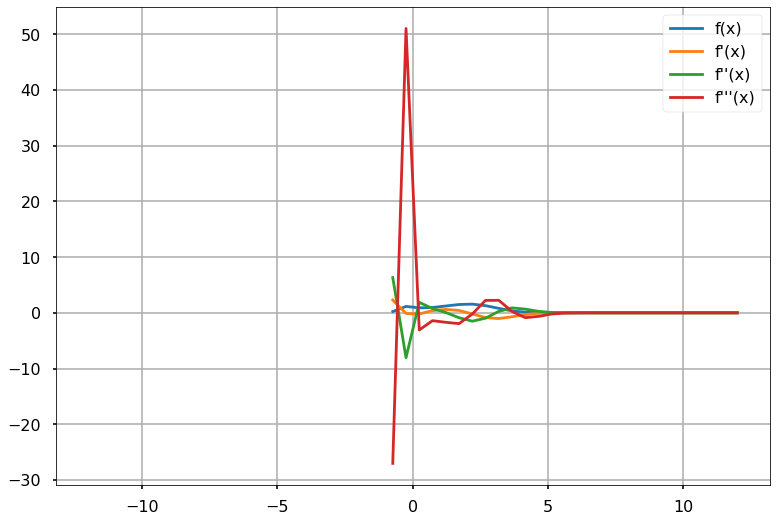

In [16]:
X = np.linspace(-12,12)
plt.plot(X,y1(X), label='f(x)')
plt.plot(X,derivative(y1,X,dx), label='f\'(x)')
plt.plot(X,derivative(y1,X,dx,n=2), label='f\'\'(x)')
plt.plot(X,derivative(y1,X,dx,n=3,order=5), label='f\'\'\'(x)')
plt.legend()
plt.grid()
plt.show()

#### Taylor Series Expansion

In [17]:
XX = np.linspace(5,7)
a = 2*np.pi
n = 7
def taylor(f,a,n,x):
    y=0
    for i in range(n+1):
        y += ( ( (derivative(f,a,dx,n=i,order=9)) * ((x-a)**i) ) / np.math.factorial(i)  )
    return y

#### Y1 using Taylor series Expansion

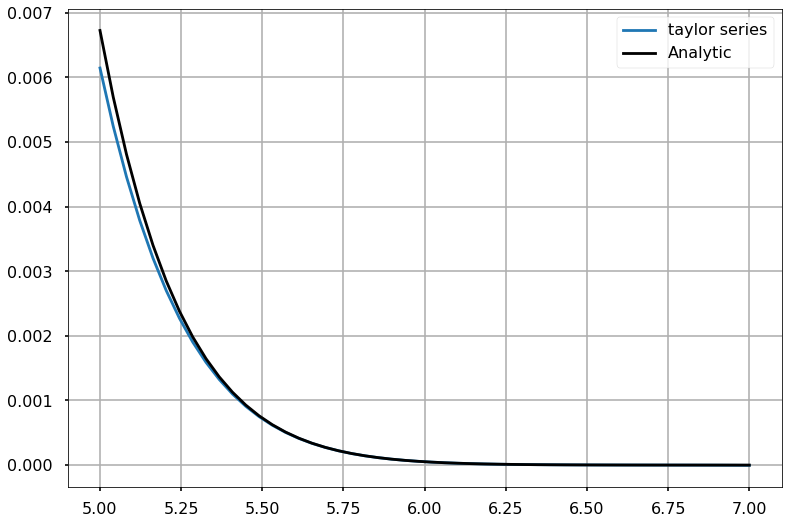

In [18]:
# plt.axvline(x = 2*np.pi, c = "k")
plt.plot(XX,taylor(y1,a,n,XX),label='taylor series')
plt.plot(XX,y1(XX),label='Analytic',c="k")
plt.legend()
plt.grid()
plt.show()
        

#### Y1 using Taylor series Expansion

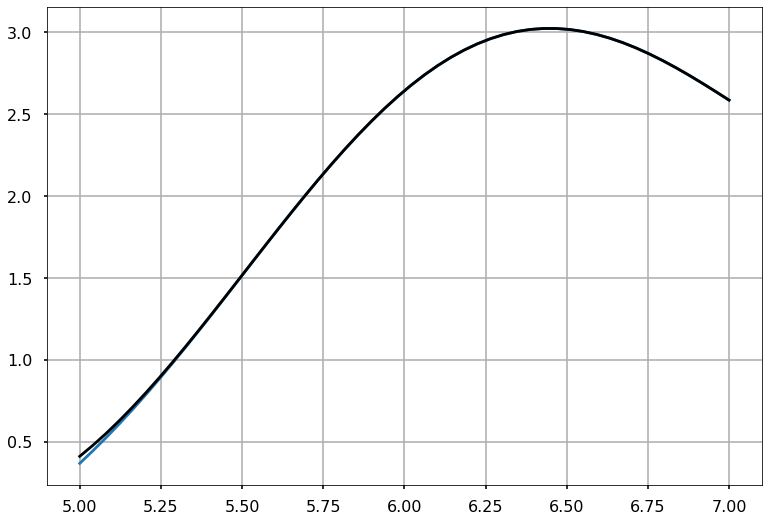

In [19]:
# plt.axvline(x = 2*np.pi, c = "k")
plt.plot(XX,taylor(y2,a,n,XX),label='taylor series')
plt.plot(XX,y2(XX),label='Analytic',c="k")
plt.grid()
plt.show()